 **Listing 7-2**
 # Reading the Dataset



In [1]:
import pandas as pd
dataset = pd.read_csv("Salaries.csv")
rank = dataset['rank']
discipline = dataset['discipline']
phd = dataset['phd']
service = dataset['service']
sex = dataset['sex']
salary = dataset['salary']
dataset.head()


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


# Line Plot
You can use line plotting as shown in Listing 7-2. It’s important to ensure
the data units, such as the phd, service, and salary variables, are used for
plotting. However, only the salaries are visible, while the phd and service
information is not clearly displayed on the plot. This is because the
numerical units in the salaries are in the hundreds of thousands, while the
phd and services information is in very small units.

**Listing 7-2.** Visualizing Patterns with High Differences in Numerical
Units

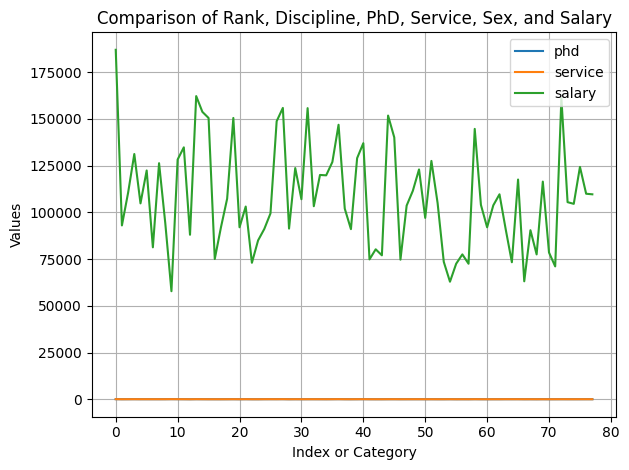

In [2]:
import matplotlib.pyplot as plt
dataset[["rank", "discipline", "phd", "service", "sex", "salary"]].plot()

plt.title('Comparison of Rank, Discipline, PhD, Service, Sex, and Salary')
plt.xlabel('Index or Category')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


**Listing 7-3.** Visualizing Patterns with Close Numerical Units


<Axes: >

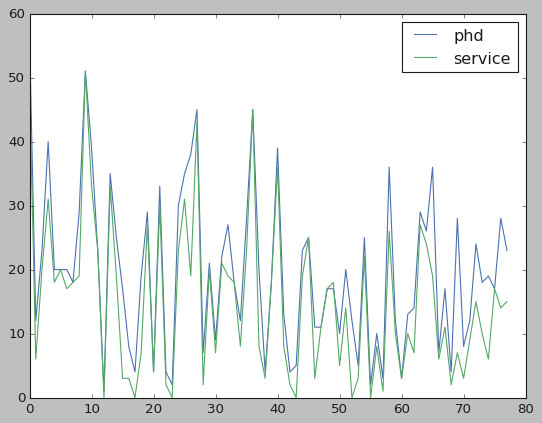

In [89]:
dataset[["phd","service"]].plot()


You can observe the correlation
between phd and services over the years, except from age 55 up to 80,
where services decline, which means that some people left the service at
the age of 55 and older.

**Listing 7-4.** Visualizing Salaries per Service Category

<Axes: xlabel='service'>

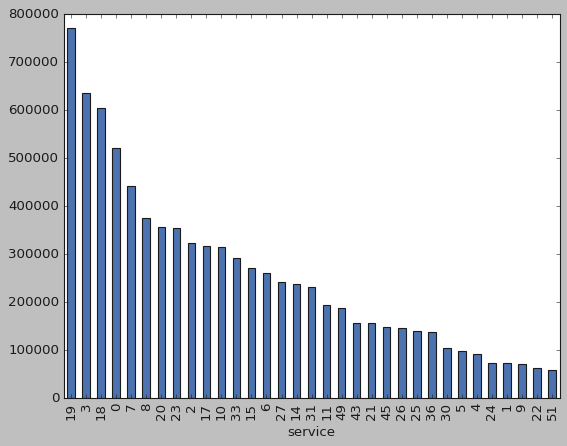

In [91]:
dataset1 = dataset.groupby(['service']).sum()
dataset1.sort_values("salary", ascending = False,inplace=True)
dataset1.head()
dataset1["salary"].plot.bar()


You can see that most people serve approximately 19 years, which is
why the highest accumulated salary is from this category.

#Bar Plot
Listing 7-5 shows how to plot the first ten records of phd and services,
and you can add a title as well. To add a title to the chart, you need to use
.bar(title="Your title").

**Listing 7-5.** Bar Plotting


<Axes: >

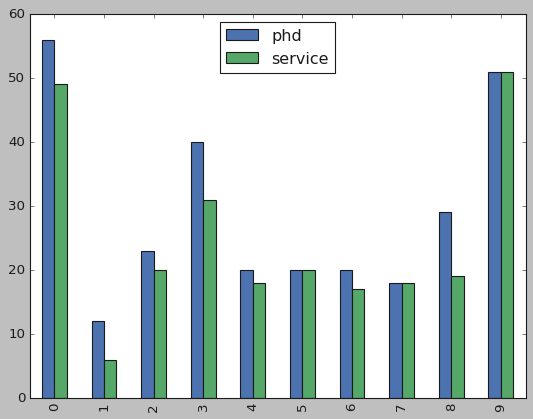

In [92]:
dataset[[ 'phd', 'service' ]].head(10).plot.bar()

<Axes: title={'center': 'Ph.D. Vs Service\n 2018'}>

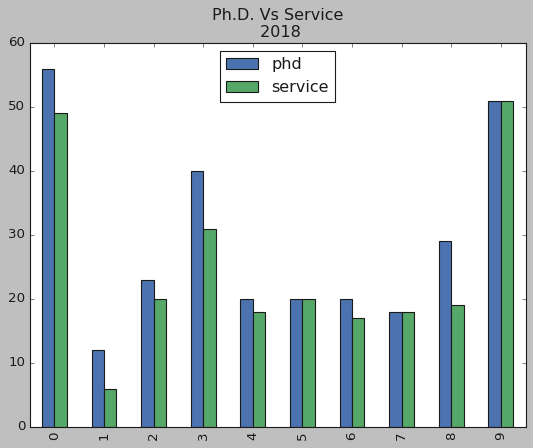

In [94]:
dataset[['phd', 'service']].head(10).plot.bar(title="Ph.D. Vs Service\n 2018")


<Axes: title={'center': 'Ph.D. Vs Service\n 2018'}>

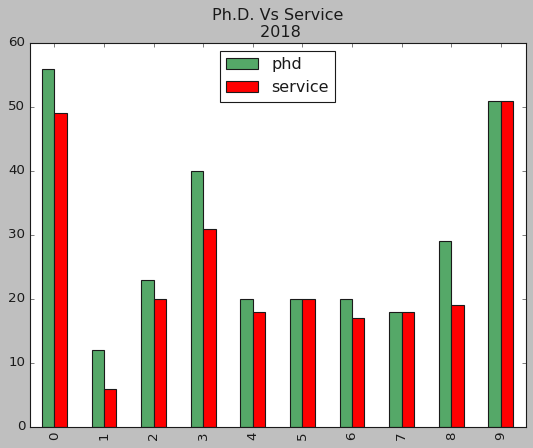

In [95]:
dataset[['phd', 'service']].head(10).plot.bar(title="Ph.D. Vs Service\n 2018" , color=['g','red'])


#Pie Chart
Pie charts are useful for comparing parts of a whole. They do not show
changes over time. Bar graphs are used to compare different groups or to
track changes over time. However, when trying to measure change over
time, bar graphs are best when the changes are larger. In addition, a pie
chart is useful for comparing small variables, but when it comes to a large
number of variables, it falls short. Listing 7-6 compares the salary package
of ten professionals from the Salaries data set.

**Listing 7-6.** Pie Chart


<Axes: ylabel='salary'>

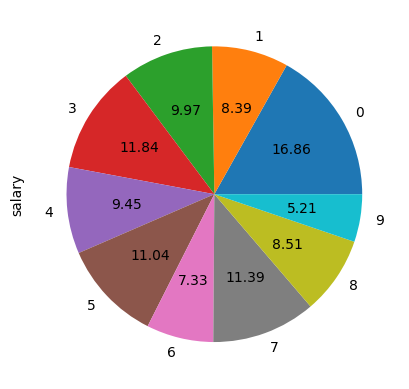

In [6]:
dataset["salary"].head(10).plot.pie(autopct='%.2f')


#Box plot
Box plotting is used to compare variables using some statistical values.
The comparable variables should be of the same data units; Listing 7-7
shows that when you compare phd and salary, it produces improper
figures and does not provide real comparison information since the
salary numerical units are much higher than the phd numerical values.
Plotting phd and services shows that the median and quantiles of phd
are higher than the median and quantiles of the service information;
in addition, the range of phd is wider than the range of service
information

**Listing 7-7.** Box Plotting

<Axes: >

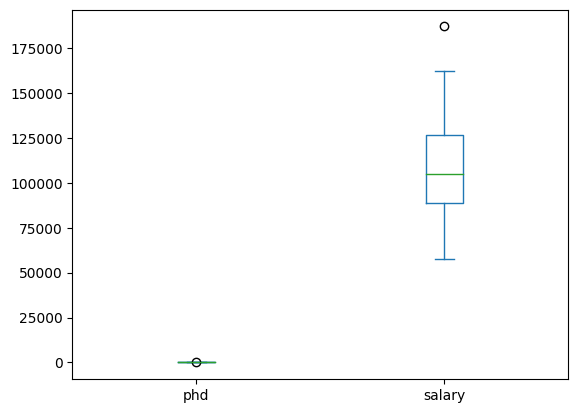

In [7]:
dataset[["phd","salary"]].head(100).plot.box()

<Axes: >

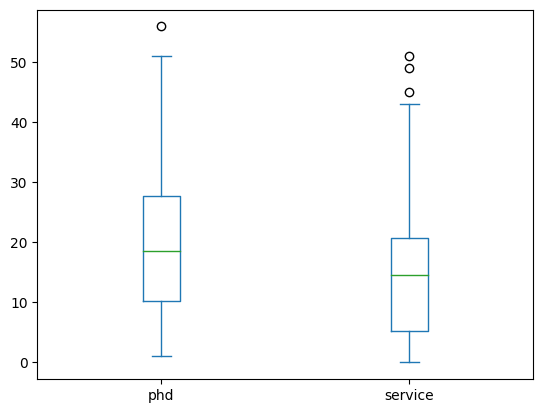

In [8]:
dataset[["phd","service"]].plot.box()


#Histogram Plot
A histogram can be used to represent a specific variable or set of
variables. Listing 7-8 plots 20 records of the salaries variables; it
shows that salary packages of about 135,000 are the most frequent in
this data set.

**Listing 7-8.** Histogram Plotting

<Axes: ylabel='Frequency'>

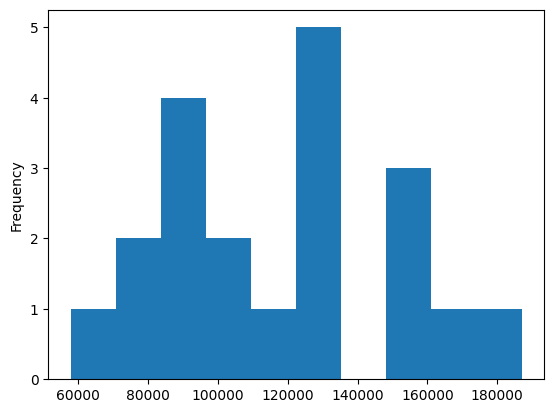

In [9]:
dataset["salary"].head(20).plot.hist()

#Scatter Plot
A scatter plot shows the relationship between two factors of an experiment
(e.g. phd and service). A trend line is used to determine positive, negative,
or no correlation. See Listing 7-9.

**Listing 7-9.** Scatter Plotting

<Axes: title={'center': 'Popuation vs area and density\n 2018'}, xlabel='phd', ylabel='service'>

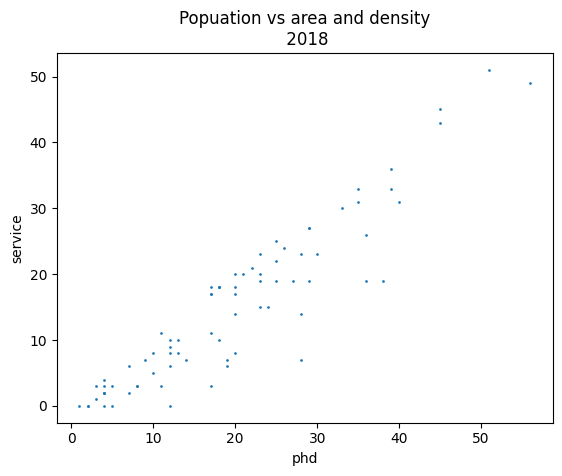

In [10]:
dataset.plot(kind='scatter', x='phd', y='service',title='Popuation vs area and density\n 2018', s=0.9)


#Seaborn Plotting System
The Python Seaborn library provides various plotting representations for
visualizing data. A strip plot is a scatter plot where one of the variables
is categorical. Strip plots can be combined with other plots to provide
additional information. For example, a box plot with an overlaid strip plot
is similar to a violin plot because some additional information about how
the underlying data is distributed becomes visible. Seaborn’s swarm plot
is virtually identical to a strip plot except that it prevents data points from
overlapping.

**Strip Plot**

Listing 7-10 uses strip plotting to display data per salary category.

<Axes: xlabel='salary'>

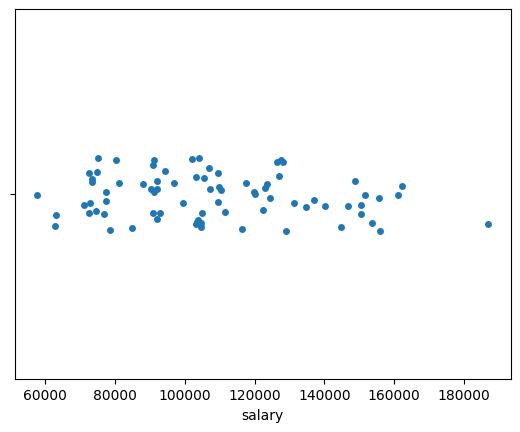

In [11]:
# Simple Strip Plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot( x =dataset['salary'])

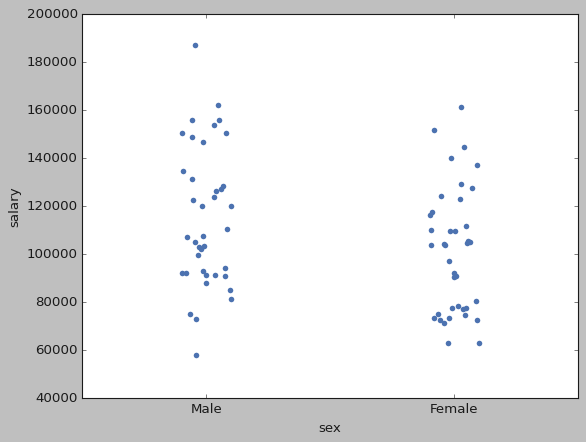

In [96]:
# Stripplot over categories
sns.stripplot( x = dataset['sex'], y= dataset['salary'],data=dataset);


*The previous example visualizes the salary variable per gender.
You can visualize the data vertically or horizontally using Listing 7-11,
which presents two disciplines, A and B. Discipline B has a bigger range
and higher packages compared to discipline A.*


**Listing 7-11.** Strip Plot with Vertical and Horizontal Visualizing


<Axes: xlabel='discipline', ylabel='salary'>

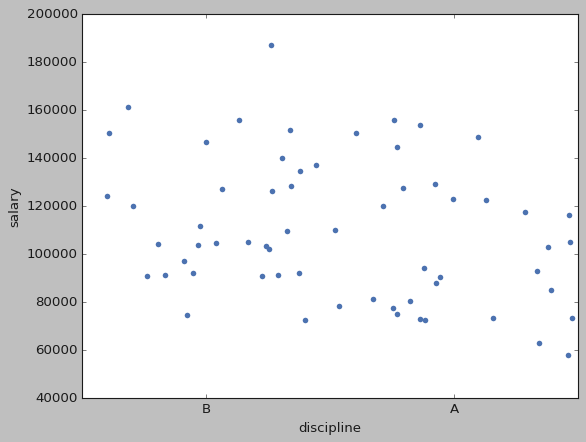

In [99]:
# Stripplot over categories
sns.stripplot( x = dataset['discipline'],
              y =dataset['salary'], data=dataset, jitter=1)

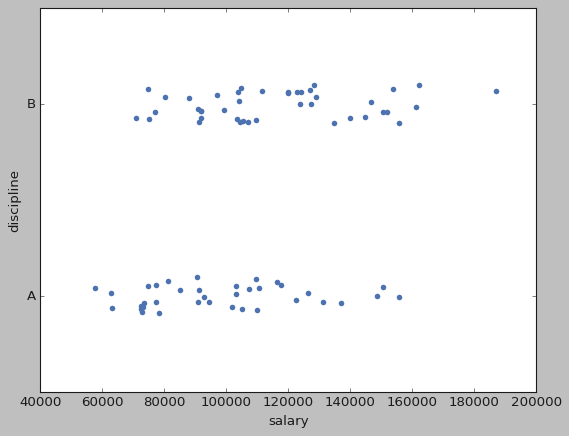

In [100]:
# Stripplot over categories Horizontal
sns.stripplot( x= dataset['salary'], y = dataset['discipline'],
data=dataset, jitter=True);

**You can visualize data in a strip plot per category; Listing 7-12 uses
the assistance prof, associate prof, and full professor categories. The hue
attribute is used to determine the legend attribute.**

**Listing 7-12.** Strip Plot per Category

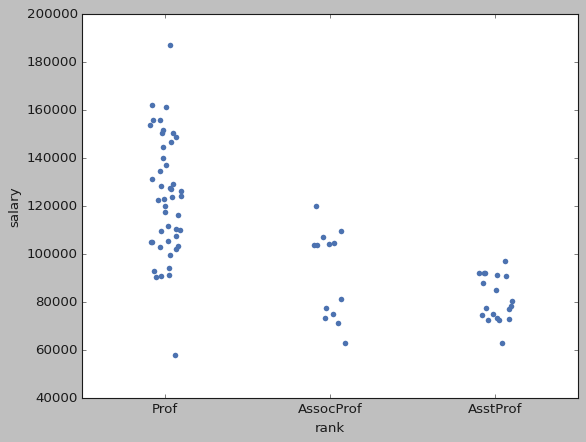

In [101]:
# Stripplot over categories
sns.stripplot( x = dataset['rank'], y= dataset['salary'],
data=dataset, jitter=True);


<Axes: xlabel='sex', ylabel='salary'>

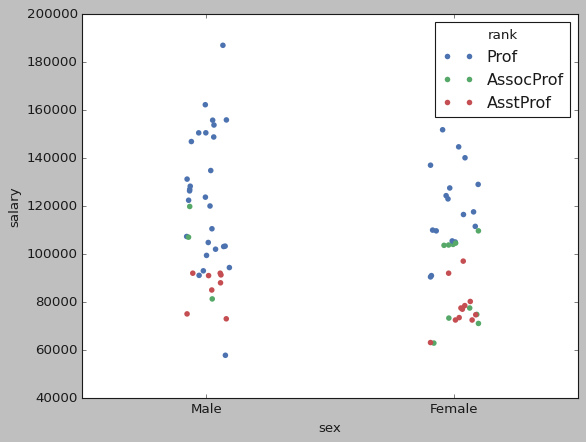

In [102]:
#Add hue to the graph
# Stripplot over categories
sns.stripplot( x ='sex', y= 'salary', hue='rank',
data=dataset, jitter=True )

#Box Plot
You can combine a box plot and strip plot to give more information on the
generated plot (see Listing 7-13). As shown, the Male category has a higher
median salary, maximum salary, and range compared to the Female
category.

**Listing 7-13.** Combined Box Plot and Strip Plot Visualization

<Axes: xlabel='salary', ylabel='sex'>

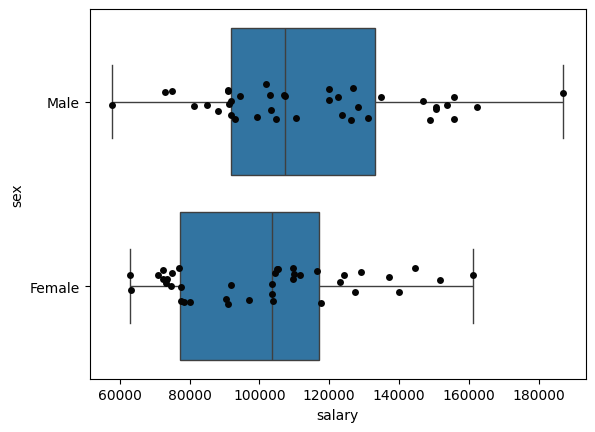

In [17]:
# Draw data on top of boxplot
import numpy as np
sns.boxplot(x = 'salary', y ='sex', data=dataset,whis=np.inf )
sns.stripplot(x = 'salary', y ='sex', data=dataset,jitter=True, color='0.02')

<Axes: xlabel='salary'>

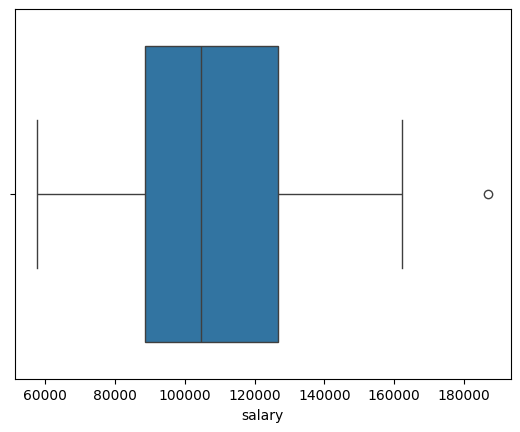

In [18]:
# box plot salaries
sns.boxplot(x = dataset['salary'])


<Axes: xlabel='salary'>

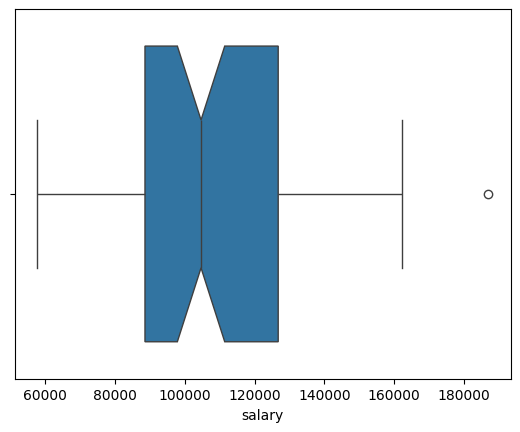

In [19]:
# box plot salaries
sns.boxplot(x = dataset['salary'], notch=True)

<Axes: xlabel='salary'>

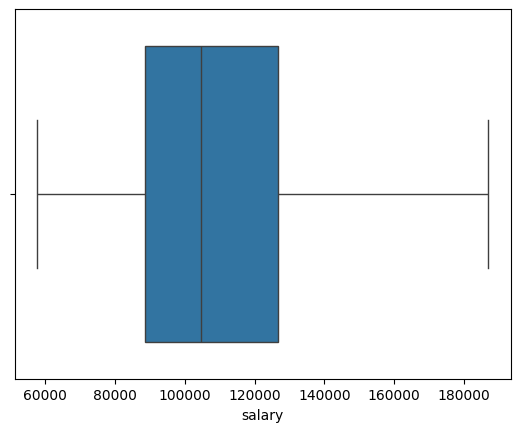

In [20]:
# box plot salaries
sns.boxplot(x = dataset['salary'], whis=2)

<Axes: xlabel='rank', ylabel='salary'>

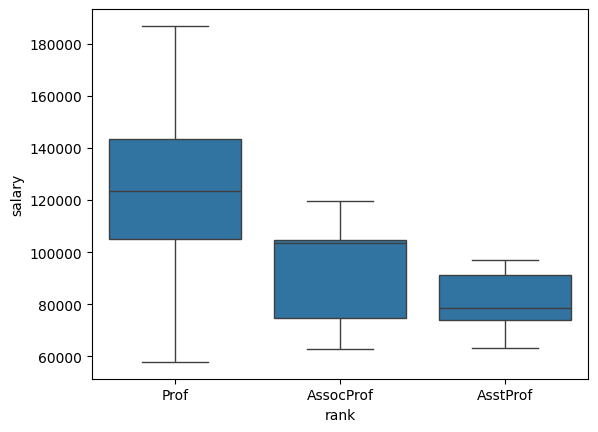

In [21]:
# box plot per rank
sns.boxplot(x = 'rank', y = 'salary', data=dataset)


<Axes: xlabel='rank', ylabel='salary'>

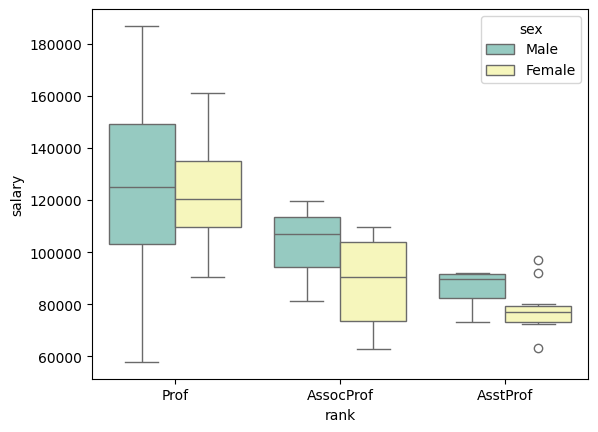

In [22]:
# box plot per rank
sns.boxplot(x = 'rank', y = 'salary', hue='sex', data=dataset,
palette='Set3')

<Axes: xlabel='rank', ylabel='salary'>

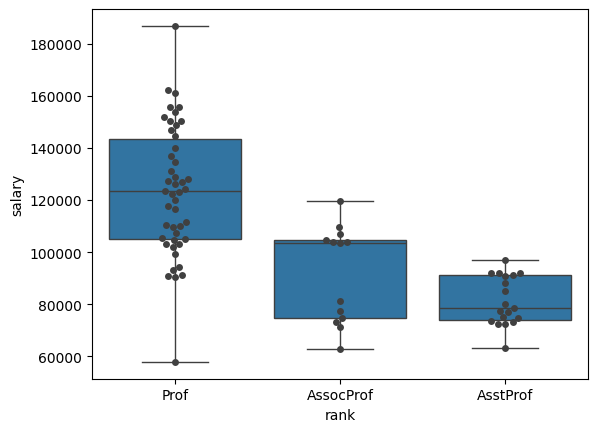

In [23]:
# box plot per rank
sns.boxplot(x = 'rank', y = 'salary', data=dataset)
sns.swarmplot(x = 'rank', y = 'salary', data=dataset,
color='0.25')

#Swarm Plot
A swarm plot is used to visualize different categories; it gives a clear
picture of a variable distribution against other variables. For instance,
the salary distribution per gender and per profession indicates that the
male professors have the highest salary range. Most of the males are
full professors, then associate, and then assistant professors. There are
more male professors than female professors, but there are more female
associate professors than male associate professors. See Listing 7-14.


**Listing 7-14.** Swarm ploting of salary against gender

<Axes: xlabel='sex', ylabel='salary'>

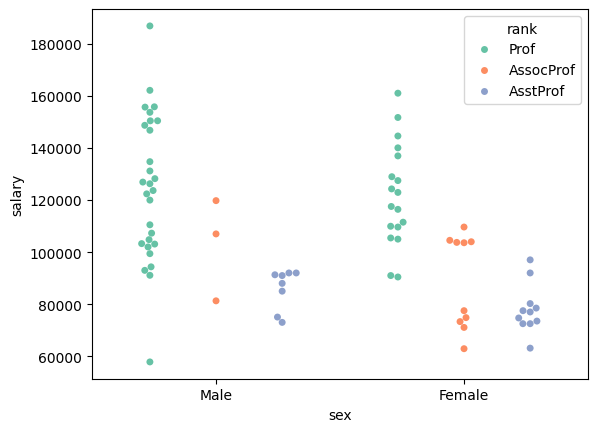

In [24]:
 # swarmplot
sns.swarmplot( x ='sex', y= 'salary', hue='rank', data=dataset,
palette="Set2", dodge=True)


<Axes: xlabel='sex', ylabel='salary'>

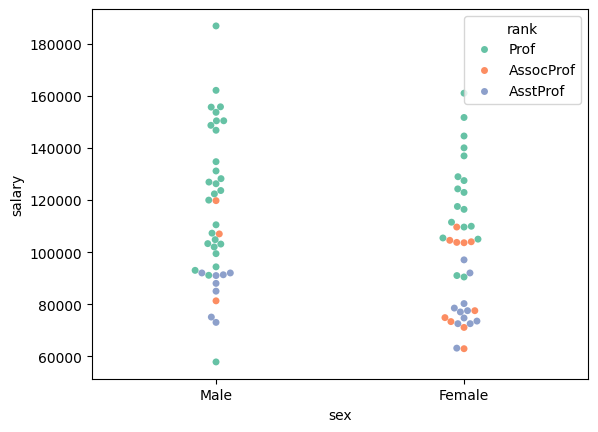

In [25]:
# swarmplot
sns.swarmplot( x ='sex', y= 'salary', hue='rank', data=dataset,
palette="Set2", dodge=False)


#Joint Plot
A joint plot combines more than one plot to visualize the selected patterns
(see Listing 7-15)


**Listing 7-15.** Joint Plot Visualization

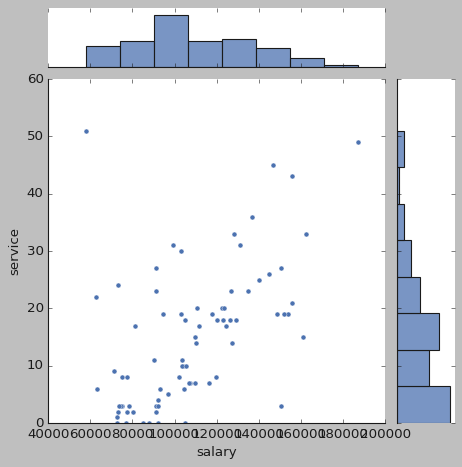

In [103]:
sns.jointplot(x = 'salary', y = 'service',
data=dataset)

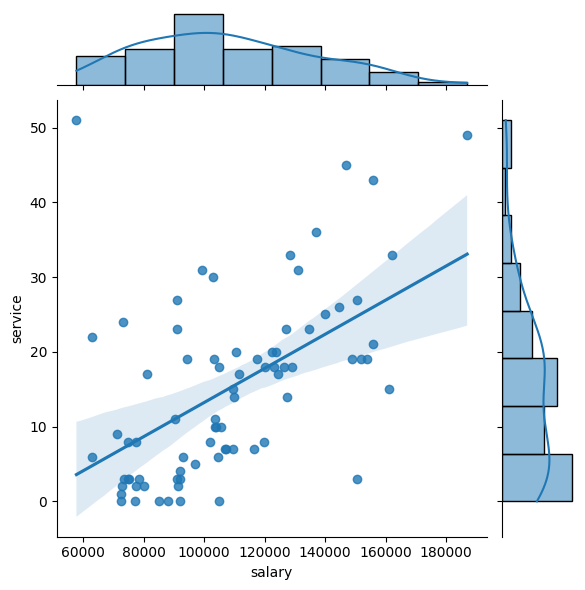

In [29]:
sns.jointplot(x='salary', y='service', data=dataset, kind='reg')

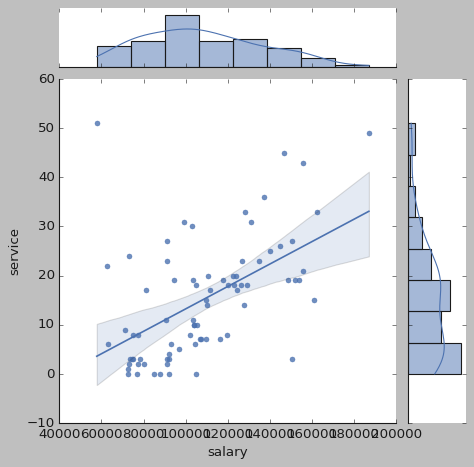

In [105]:
sns.jointplot(x = 'salary', y = 'service', data=dataset,
kind='reg')

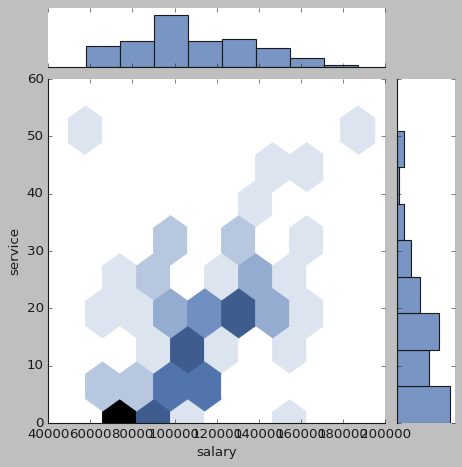

In [106]:
sns.jointplot(x = 'salary', y = 'service', data=dataset,
kind='hex')


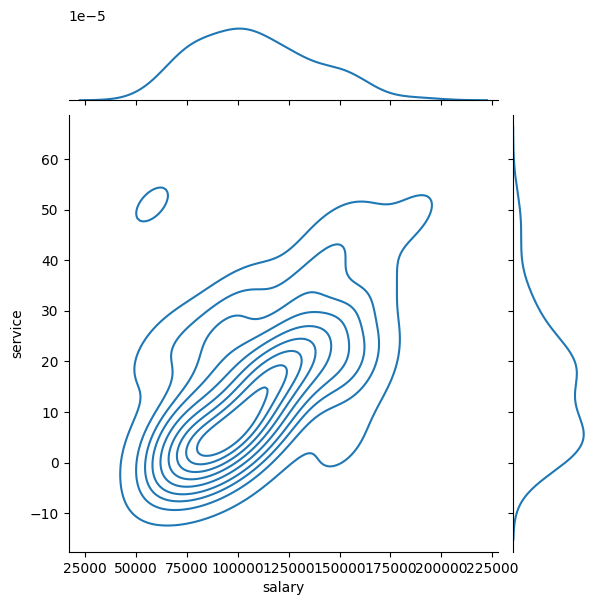

In [38]:
# plt.figure(figsize=(25, 30))
sns.jointplot(x = 'salary', y = 'service', data=dataset,
kind='kde')

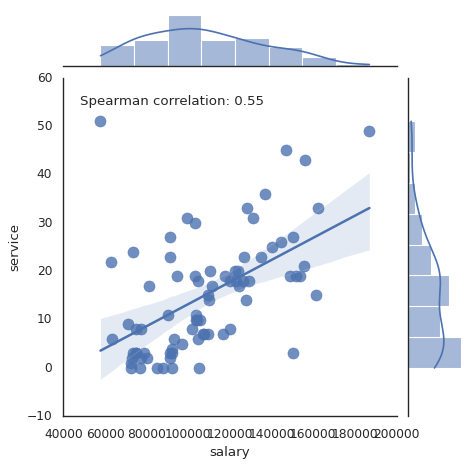

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Create a jointplot with Seaborn
sns.set(style="white", color_codes=True)
g = sns.jointplot(x='salary', y='service', data=dataset, kind='reg', scatter_kws={'s': 100})

# Calculate Spearman correlation coefficient
rs, _ = spearmanr(dataset['salary'], dataset['service'])

# Annotate the plot with correlation coefficient
plt.text(0.05, 0.95, f'Spearman correlation: {rs:.2f}', transform=g.ax_joint.transAxes, fontsize=12,
         verticalalignment='top')

# Display the plot
plt.show()

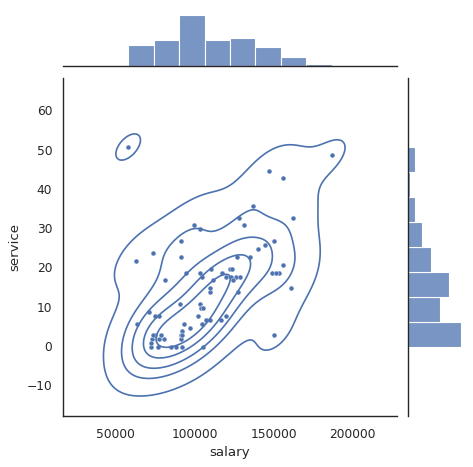

In [108]:
sns.jointplot(x = 'salary', y = 'service',data=dataset).plot_joint(sns.kdeplot, n_levels=6)


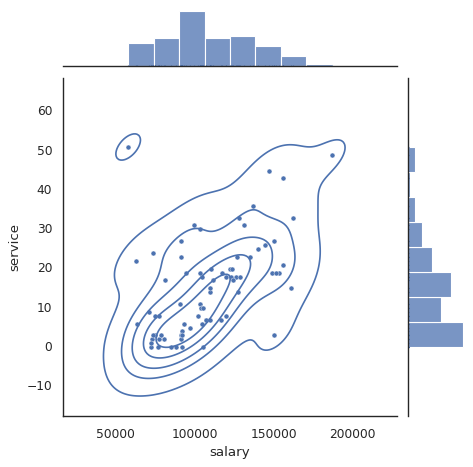

In [111]:
sns.jointplot(x = 'salary', y = 'service',data=dataset).plot_joint( sns.kdeplot,n_levels=6).plot_marginals(sns.rugplot)


#Matplotlib Plot:
Matplotlib is a Python 2D plotting library that produces high-quality
figures in a variety of hard-copy formats and interactive environments
across platforms. In Matplotlib, you can add features one by one, such as
adding a title, labels, legends, and more.

#### line Plot
In inline plotting, you should determine the x- and y-axes, and then you
can add more features such as a title, a legend, and more (see Listing 7-16).

**Listing 7-16.** Matplotlib Line Plotting

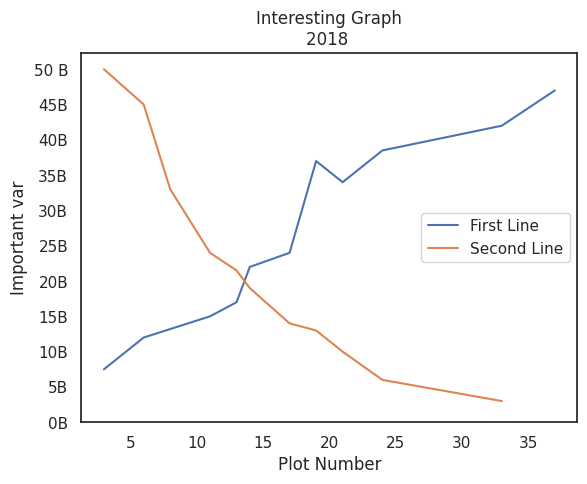

In [46]:
import matplotlib.pyplot as plt
x =[3,6,8,11,13,14,17,19,21,24,33,37]
y = [7.5,12,13.2,15,17,22,24,37,34,38.5,42,47]
x2 =[3,6,8,11,13,14,17,19,21,24,33]
y2 = [50,45,33,24,21.5,19,14,13,10,6,3]
plt.plot(x,y, label='First Line')
plt.plot(x2, y2, label='Second Line')
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Interesting Graph\n2018 ')
plt.yticks([0,5,10,15,20,25,30,35,40,45,50],['0B','5B','10B','15B','20B','25B','30B','35B','40B','45B','50 B'])
plt.legend()
plt.show()

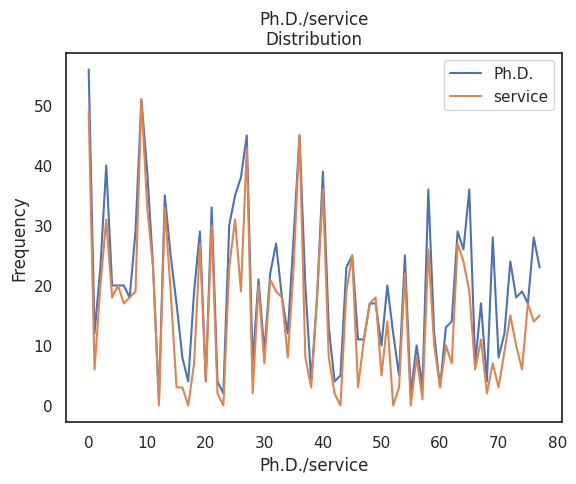

In [47]:
plt.plot(phd, label='Ph.D.')
plt.plot(service, label='service')
plt.xlabel('Ph.D./service')
plt.ylabel('Frequency')
plt.title('Ph.D./service\nDistribution')
plt.legend()
plt.show()



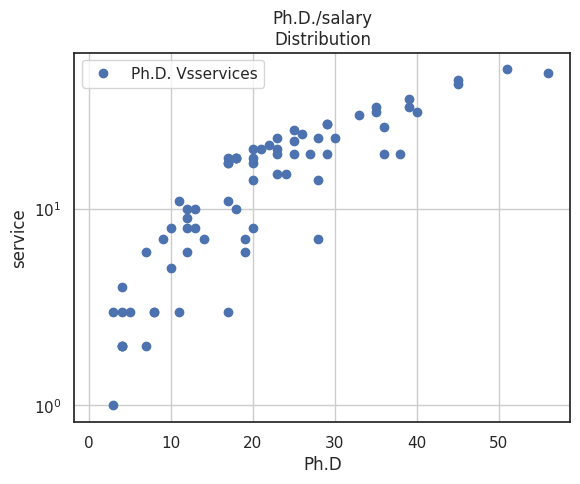

In [48]:
plt.plot(phd, service, 'bo', label="Ph.D. Vsservices", lw=10)
plt.grid()
plt.legend()
plt.xlabel('Ph.D')
plt.ylabel('service')
plt.title('Ph.D./salary\nDistribution')
plt.yscale('log')


##Bar Chart
**Listing 7-17** shows how to create a bar chart to present students registered
for courses; there are two students who are registered for four courses.



**Listing 7-17.** Matplotlib Bar Chart Plotting


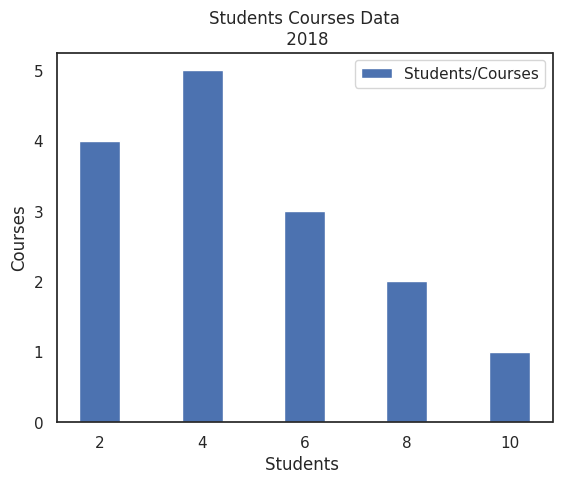

In [50]:
Students = [2,4,6,8,10]
Courses = [4,5,3,2,1]
plt.bar(Students,Courses, label="Students/Courses")
plt.xlabel('Students ')
plt.ylabel('Courses')
plt.title('Students Courses Data\n 2018')
plt.legend()
plt.show()

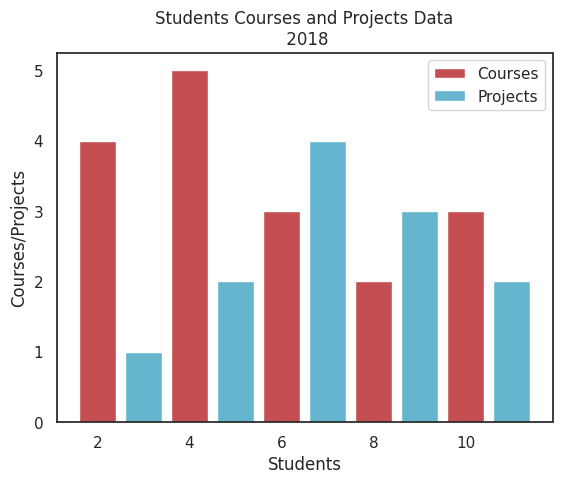

In [51]:
Students = [2,4,6,8,10]
Courses = [4,5,3,2,3]
stds = [3,5,7,9,11]
Projects = [1,2,4,3,2]
plt.bar(Students, Courses, label="Courses", color='r')
plt.bar(stds, Projects, label="Projects", color='c')
plt.xlabel('Students')
plt.ylabel('Courses/Projects')
plt.title('Students Courses and Projects Data\n 2018')
plt.legend()
plt.show()


# Histogram Plot
Listing 7-18 shows how to create a histogram showing age frequencies;
most people in the data set are between 30 and 40. In addition, you c


**Listing 7-18.** Matplotlib Histogram Plotting


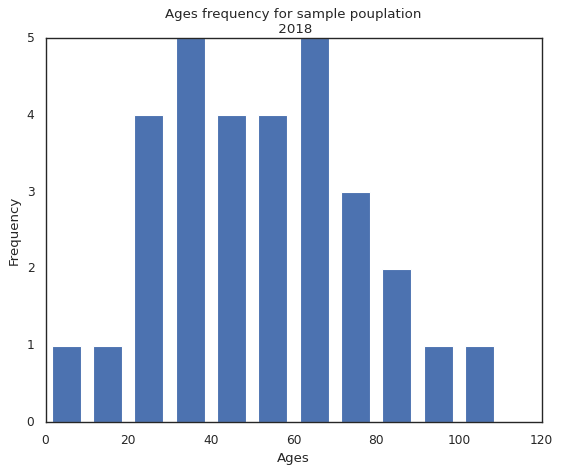

In [112]:
Ages = [22.5, 10, 55, 8, 62, 45, 21, 34, 42, 45, 99,75, 82,77, 55, 43, 66, 66, 78, 89, 101, 34, 65, 56,25, 34,52, 25, 63, 37, 32]
binsx = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.hist(Ages, bins=binsx, histtype='bar', rwidth=0.7)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Ages frequency for sample pouplation\n 2018')
plt.show()


*Visualize service years since Ph.D. had attained*

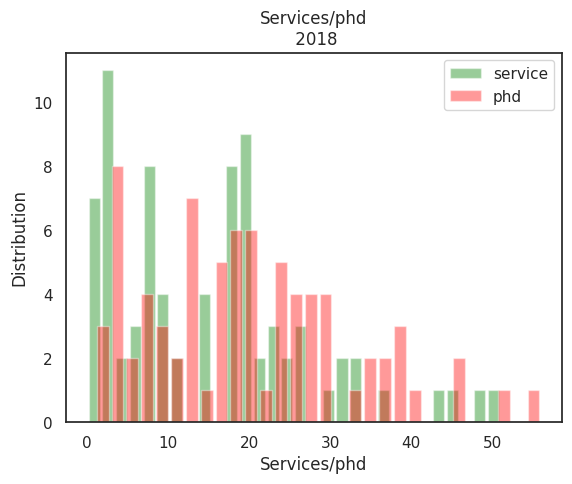

In [55]:
plt.hist(service, bins=30, alpha=0.4, rwidth=0.8,color='green', label='service')
plt.hist(phd, bins=30, alpha=0.4, rwidth=0.8,
color='red', label='phd')
plt.xlabel('Services/phd')
plt.ylabel('Distribution')
plt.title('Services/phd\n 2018')
plt.legend(loc='upper right')
plt.show()

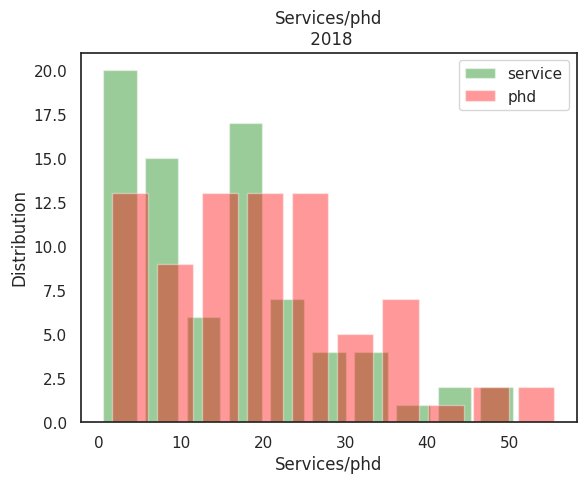

In [57]:
plt.hist(service, bins=10, alpha=0.4, rwidth=0.8,color='green', label='service')
plt.hist(phd, bins=10, alpha=0.4, rwidth=0.8,color='red', label='phd')
plt.xlabel('Services/phd')
plt.ylabel('Distribution')
plt.title('Services/phd\n 2018')
plt.legend(loc='upper right')
plt.show()

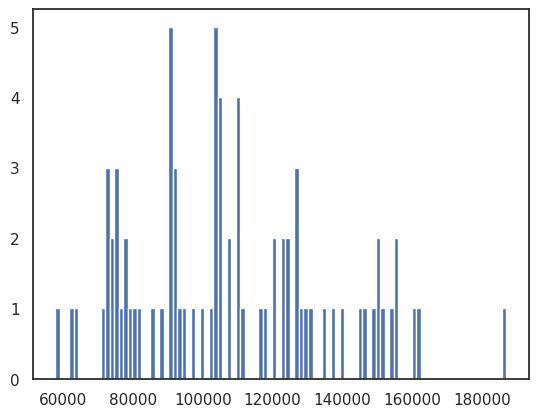

In [58]:
plt.hist(salary, bins=100)
plt.show()

# Scatter Plot
Listing 7-19 shows how to create a scatter plot to present students
registered for courses, where four students are registered for five courses

**Listing 7-19.** Matplotlib Scatter Plot


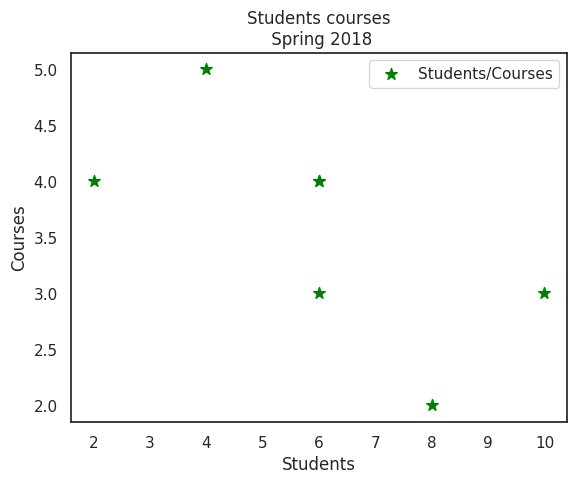

In [61]:
Students = [2,4,6,8,6,10, 6]
Courses = [4,5,3,2,4, 3, 4]
plt.scatter(Students,Courses, label='Students/Courses',color='green', marker='*', s=75 )
plt.xlabel('Students')
plt.ylabel('Courses')
plt.title('Students courses\n Spring 2018')
plt.legend()

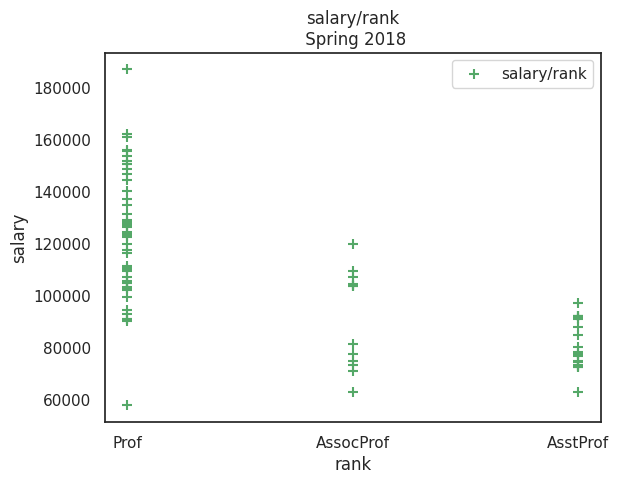

In [64]:
plt.scatter(rank,salary, label='salary/rank',color='g', marker='+', s=50 )
plt.xlabel('rank')
plt.ylabel('salary')
plt.title('salary/rank\n Spring 2018')
plt.legend()
plt.show()

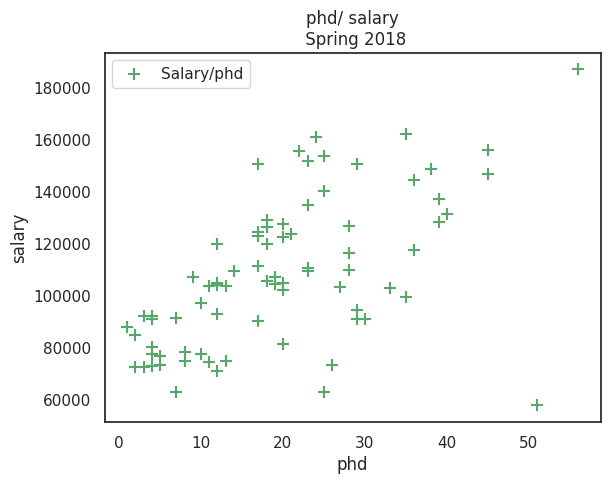

In [65]:
plt.scatter(phd,salary, label='Salary/phd', color='g',marker='+', s=80 )
plt.xlabel('phd')
plt.ylabel('salary')
plt.title('phd/ salary\n Spring 2018')
plt.legend()
plt.show()


#Stack Plot
Stack plots present the frequency of every activity, such as the frequency
of sleeping, eating, working, and playing per day (see Listing 7-20). In
this data set, on day 2, a person spent eight hours sleeping, three hours in
eating, eight hours working, and five hours playing.






**Listing 7-20.** Persons Weekly Spent Time per activities using
Matplotlib Stack Plot

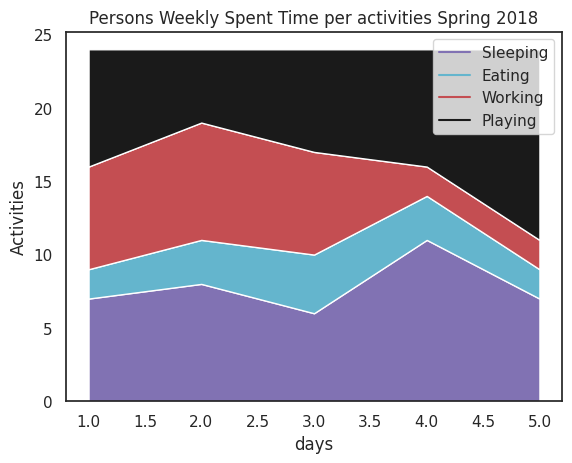

In [67]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]
plt.plot([],[], color='m', label='Sleeping')
plt.plot([],[], color='c', label='Eating')
plt.plot([],[], color='r', label='Working')
plt.plot([],[], color='k', label='Playing')
plt.stackplot(days, sleeping, eating, working ,playing, colors=['m','c', 'r', 'k'])
plt.xlabel('days')
plt.ylabel('Activities')
plt.title('Persons Weekly Spent Time per activities Spring 2018')
plt.legend()
plt.show()

#Pie Chart
In Listing 7-21, you are using the explode attribute to slice out a specific
activity. After that, you can add the gender and title to the pie chart.

**Listing 7-21.** Persons Weekly Spent Time per activities using
Matplotlib Pie Chart

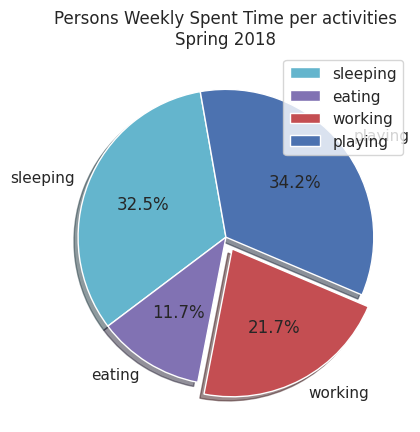

In [68]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]
slices = [39,14,26,41]
activities = ['sleeping', 'eating', 'working','playing']
cols = ['c','m','r', 'b','g']
plt.pie(slices,
labels= activities,
colors= cols,
startangle=100,
shadow=True,
explode = (0.0,0.0,0.09,0),
autopct = '%1.1f%%')
plt.title('Persons Weekly Spent Time per activities\nSpring 2018')
plt.legend()
plt.show()


#Summary
This chapter covered how to plot data from different collection structures.
You learned the following:

– How to directly plot data from a series, data frame, or panel
using Python plotting tools such as line plots, bar plots, pie
charts, box plots, histogram plots, and scatter plots

– How to implement the Seaborn plotting system using
strip plotting, box plotting, swarm plotting, and joint
plotting

– How to implement Matplotlib plotting using line plots,
bar charts, histogram plots, scatter plots, stack plots, and
pie charts

The next chapter will cover the techniques you’ve studied in this book via
two different case studies; it will make recommendations, and much more

#Exercises and Answers
**1.** Create 500 random temperature readings for six
cities over a season and then plot the generated data
using Matplotlib.


**Listing 7-22.** Plotting the Temperature Data of Six Cities

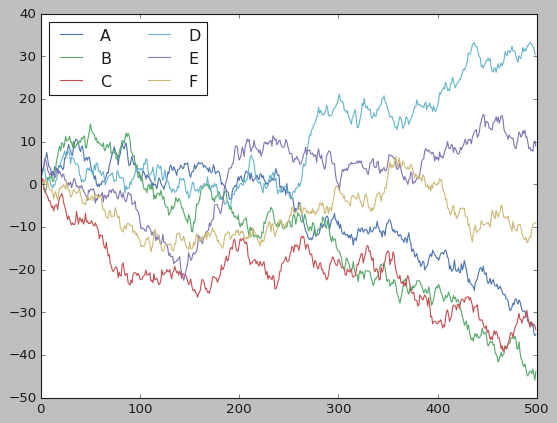

In [70]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

# Create temperature data
rng = np.random.RandomState(0)
season1 = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(season1)
plt.legend('ABCDEF', ncol=2, loc='upper left');




**2.** Load the well-known Iris data set, which lists
measurements of petals and sepals of three iris
species. Then plot the correlations between each
pair using the .pairplot() method.

**Listing 7-23.** Pair Correlations


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


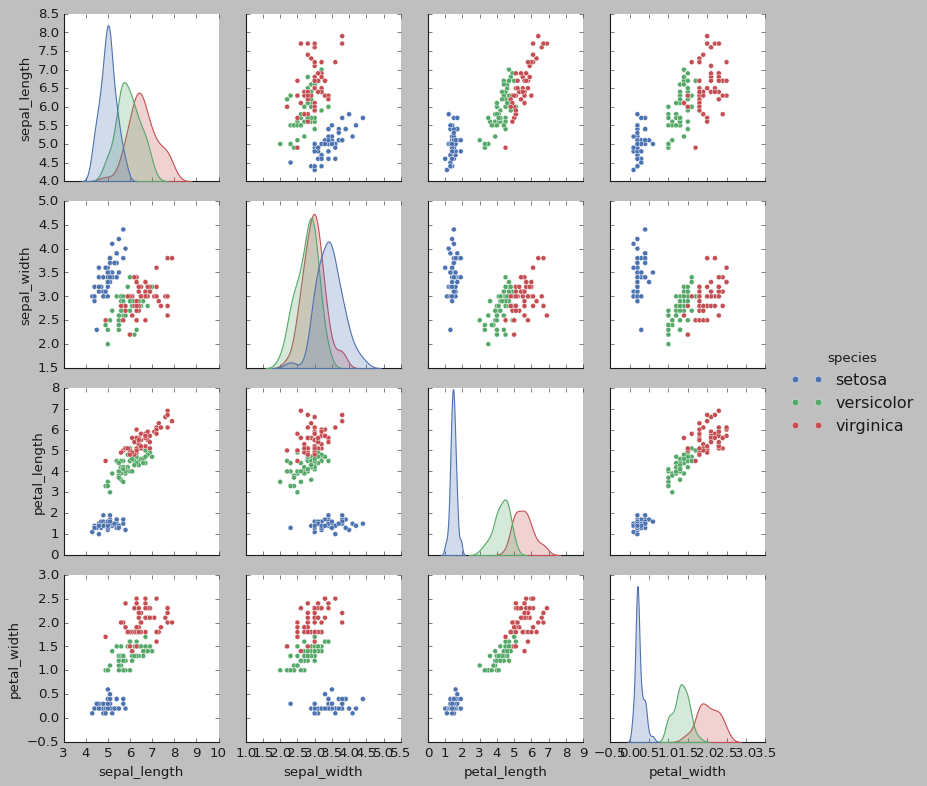

In [71]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()
sns.pairplot(iris, hue='species', size=2.5);

**3.** Load the well-known Tips data set, which shows the
number of tips received by restaurant staff based on
various indicator data; then plot the percentage of
tips per bill according to staff gender.


**Listing 7-24.** First five records in the Tips dataset


In [72]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


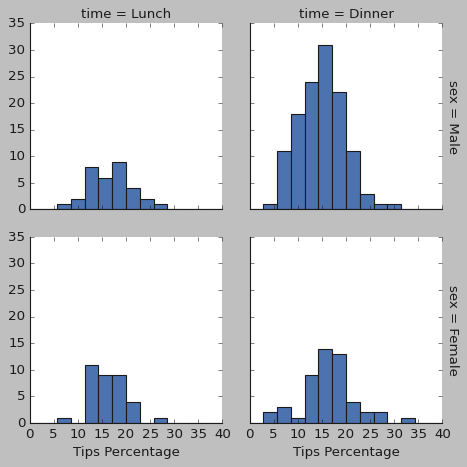

In [73]:
tips['Tips Percentage'] = 100 * tips['tip'] /tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time",margin_titles=True)
grid.map(plt.hist, "Tips Percentage", bins=np.
linspace(0, 40, 15));


**4.** Load the well-known Tips data set, which shows the
number of tips received by restaurant staff based on
various indicator data; then implement the factor
plots to visualize the total bill per day according to
staff gender.


**Listing 7-25.** Implementing Factor Plotting

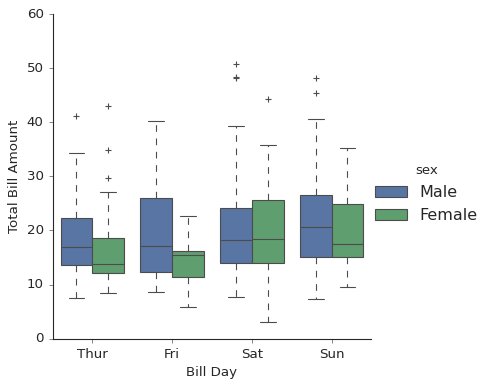

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Bill Day", "Total Bill Amount")

plt.show()


**5.** Reimplement the previous exercise using the
Seaborn joint plot distributions.


**Listing 7-26.** Implementing Joint Plot Distributions

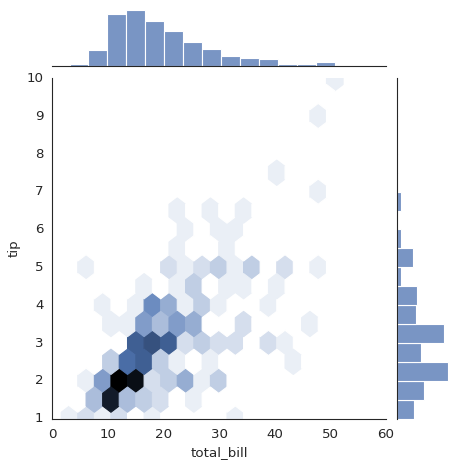

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

with sns.axes_style('white'):
 sns.jointplot(x = "total_bill", y = "tip",data=tips, kind='hex')
